<a href="https://colab.research.google.com/github/Zncl2222/MachineLearningPractice/blob/pytorcch_tutorial/pytorch_tutorial/03_pytorch_computer_vision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
from torch import nn

import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor

import matplotlib.pyplot as plt

device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(torch.__version__)
print(torchvision.__version__)

2.2.1+cu121
0.17.1+cu121


In [2]:
train_data = datasets.FashionMNIST(
  root='data',
  train=True,
  download=True,
  transform=transforms.ToTensor(),
  target_transform=None # How do we want to transform the labels/targets
)

test_data = datasets.FashionMNIST(
    root='data',
    train=False,
    download=True,
    transform=transforms.ToTensor(),
    target_transform=None
)

100%|██████████| 26421880/26421880 [00:01<00:00, 16117780.92it/s]


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 275097.91it/s]


Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:00<00:00, 5056190.86it/s]


Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 14559863.11it/s]

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



In [3]:
len(train_data), len(test_data)

(60000, 10000)

In [4]:
image, label = train_data[0]

image, label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [5]:
 class_names = train_data.classes
 class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [6]:
class_to_idx = train_data.class_to_idx
class_to_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [7]:
train_data.targets

tensor([9, 0, 0,  ..., 3, 0, 5])

In [8]:
image.shape, label
print(f"image shapes: {image.shape} -> [color_channels, height, width]")
print(f"image label: {class_names[label]}")

image shapes: torch.Size([1, 28, 28]) -> [color_channels, height, width]
image label: Ankle boot


torch.Size([1, 28, 28])


Text(0.5, 1.0, '9')

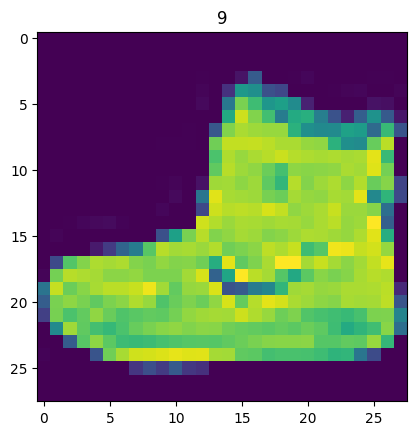

In [9]:
image, label = train_data[0]
print(image.shape)
plt.imshow(image.squeeze())
plt.title(label)


(-0.5, 27.5, 27.5, -0.5)

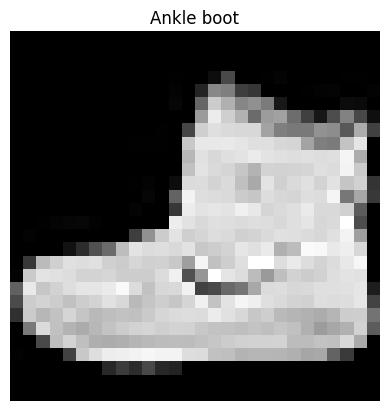

In [10]:
plt.imshow(image.squeeze(), cmap='gray')
plt.title(class_names[label]);
plt.axis(False)

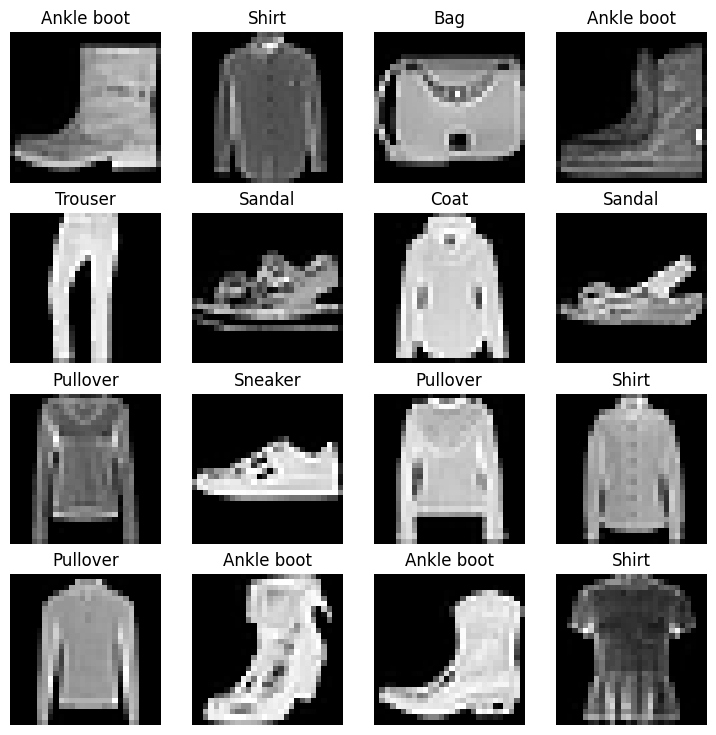

In [11]:
torch.manual_seed(42)
fig = plt.figure(figsize=(9, 9))
rows, cols = 4, 4
for i in range(1, rows * cols + 1):
  random_idx = torch.randint(0, len(train_data), size=[1]).item()
  img, label = train_data[random_idx]
  fig.add_subplot(rows, cols, i)
  plt.imshow(img.squeeze(), cmap='gray')
  plt.title(class_names[label])
  plt.axis(False)

In [12]:
train_data, test_data

(Dataset FashionMNIST
     Number of datapoints: 60000
     Root location: data
     Split: Train
     StandardTransform
 Transform: ToTensor(),
 Dataset FashionMNIST
     Number of datapoints: 10000
     Root location: data
     Split: Test
     StandardTransform
 Transform: ToTensor())

In [59]:
from torch.utils.data import DataLoader
BATCH_SIZE = 32
train_dataloader = DataLoader(dataset=train_data, batch_size=BATCH_SIZE, shuffle=True)
test_dataloader = DataLoader(dataset=test_data, batch_size=BATCH_SIZE, shuffle=False)
train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x7e09771bca60>,
 <torch.utils.data.dataloader.DataLoader at 0x7e09771bc190>)

In [14]:
len(train_dataloader), len(test_dataloader)

(1875, 313)

In [15]:
train_features_batch, train_labels_batch = next(iter(train_dataloader))
train_features_batch.shape, train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

(-0.5, 27.5, 27.5, -0.5)

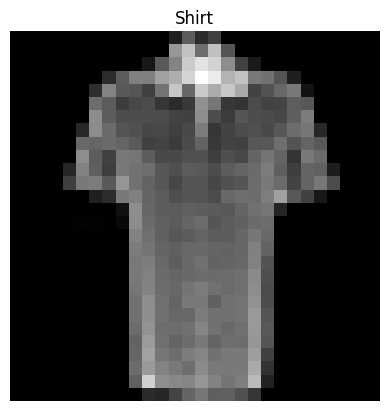

In [16]:
torch.manual_seed(42)
random_idx = torch.randint(0, len(train_features_batch), size=[1]).item()

img, label = train_features_batch[random_idx], train_labels_batch[random_idx]
plt.imshow(img.squeeze(), cmap='gray')
plt.title(class_names[label])
plt.axis(False)

In [17]:
flatten_model = nn.Flatten()
x = train_features_batch[0]

output = flatten_model(x)

x.shape, output.shape

(torch.Size([1, 28, 28]), torch.Size([1, 784]))

In [18]:
from torch import nn

class FashionMNISTModelV0(nn.Module):
  def __init__(
    self,
    input_shape: int,
    hidden_units: int,
    output_shape: int
  ):
    super().__init__()
    self.layer_stack = nn.Sequential(
      nn.Flatten(),
      nn.Linear(in_features=input_shape, out_features=hidden_units),
      nn.Linear(in_features=hidden_units, out_features=output_shape)
    )

  def forward(self, x: torch.Tensor) -> torch.Tensor:
    return self.layer_stack(x)

model_0 = FashionMNISTModelV0(
  input_shape=784, # 28 * 28 from flatten the image
  hidden_units=10,
  output_shape=len(class_names)
).to('cpu')
model_0

FashionMNISTModelV0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [19]:
dummy_x = torch.rand([1, 1, 28, 28])
model_0(dummy_x)

tensor([[ 0.4283,  0.1136, -0.3903, -0.0246, -0.0698,  0.2508,  0.4007, -0.4172,
         -0.0264, -0.2463]], grad_fn=<AddmmBackward0>)

In [20]:
def accuracy_fn(y_true, y_pred):
  correct = torch.eq(y_true, y_pred).sum().item()
  acc = (correct / len(y_pred)) * 100
  return acc

In [21]:
import requests
from pathlib import Path

# Download helper functions from Learn PyTorch repo (if not already downloaded)
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download")
else:
  print("Downloading helper_functions.py")
  # Note: you need the "raw" GitHub URL for this to work
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

In [22]:
from helper_functions import accuracy_fn

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_0.parameters(), lr=0.1)

In [23]:
from timeit import default_timer as timer

def print_train_time(
  start: float,
  end: float,
  device: torch.device=None
):
  total_time = end - start
  print(f"Train time on {device}: {total_time:.3f} seconds")
  return total_time

In [24]:
start_time = timer()

end_time = timer()
print_train_time(start=start_time, end=end_time, device='cpu')

Train time on cpu: 0.000 seconds


5.538000000626653e-05

In [25]:
from tqdm.auto import tqdm

torch.manual_seed(42)
train_time_start_on_cpu = timer()

epochs = 3
device = 'cpu'

for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch}\n-------")
  train_loss = 0

  for batch, (X, y) in enumerate(train_dataloader):
    model_0.train()
    y_pred = model_0(X)
    loss = loss_fn(y_pred, y)
    train_loss += loss # accumulate train loss
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if batch % 400 == 0:
      print(f"looked at {batch * len(X)}/{len(train_dataloader.dataset)} samples.")

  train_loss /= len(train_dataloader)

  # Testing
  test_loss, test_acc = 0, 0
  model_0.eval()
  with torch.inference_mode():
    for X_test, y_test in test_dataloader:
      test_pred = model_0(X_test)
      test_loss += loss_fn(test_pred, y_test)
      test_acc += accuracy_fn(y_test, test_pred.argmax(dim=1))
    test_loss /= len(test_dataloader)
    test_acc /= len(test_dataloader)

  print(f"\nTrain loss: {train_loss:.4f} | Test loss: {test_loss:.4f}, Test acc: {test_acc:.4f}")

train_time_end_on_cpu = timer()
total_train_time_model_0 = print_train_time(
  start=train_time_start_on_cpu,
  end=train_time_end_on_cpu,
  device=device,
)

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
-------
looked at 0/60000 samples.
looked at 12800/60000 samples.
looked at 25600/60000 samples.
looked at 38400/60000 samples.
looked at 51200/60000 samples.

Train loss: 0.5948 | Test loss: 0.5170, Test acc: 81.8291
Epoch: 1
-------
looked at 0/60000 samples.
looked at 12800/60000 samples.
looked at 25600/60000 samples.
looked at 38400/60000 samples.
looked at 51200/60000 samples.

Train loss: 0.4774 | Test loss: 0.5343, Test acc: 81.3998
Epoch: 2
-------
looked at 0/60000 samples.
looked at 12800/60000 samples.
looked at 25600/60000 samples.
looked at 38400/60000 samples.
looked at 51200/60000 samples.

Train loss: 0.4555 | Test loss: 0.5168, Test acc: 82.8874
Train time on cpu: 35.681 seconds


In [26]:
torch.manual_seed(42)

def eval_model(
  model: torch.nn.Module,
  data_loader: torch.utils.data.DataLoader,
  loss_fn: torch.nn.Module,
  accuracy_fn,
  device='cpu'
):
  loss, acc = 0, 0
  model.eval()
  with torch.inference_mode():
    for X, y in data_loader:
      X, y = X.to(device), y.to(device)
      y_pred = model(X)
      loss += loss_fn(y_pred, y)
      acc += accuracy_fn(y_true=y, y_pred=y_pred.argmax(dim=1))
    loss /= len(data_loader)
    acc /= len(data_loader)
  return {
    'model_name': model.__class__.__name__,
    'model_loss': loss.item(),
    'model_acc': acc
  }

model_0_results = eval_model(
  model=model_0,
  data_loader=test_dataloader,
  loss_fn=loss_fn,
  accuracy_fn=accuracy_fn
)
model_0_results

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.5161769986152649,
 'model_acc': 82.9173322683706}

In [27]:
import torch
from torch import nn
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cpu'

In [28]:
class FashionMNISTModelV1(nn.Module):
  def __init__(
    self,
    input_shape: int,
    hidden_units: int,
    output_shape: int
  ):
    super().__init__()
    self.layer_stack = nn.Sequential(
      nn.Flatten(),
      nn.Linear(in_features=input_shape, out_features=hidden_units),
      nn.ReLU(),
      nn.Linear(in_features=hidden_units, out_features=output_shape),
      nn.ReLU()
    )

  def forward(self, x: torch.Tensor) -> torch.Tensor:
    return self.layer_stack(x)

In [29]:
torch.manual_seed(42)
model_1 = FashionMNISTModelV1(
  input_shape=784,
  hidden_units=10,
  output_shape=len(class_names)
).to(device)

In [30]:
from helper_functions import accuracy_fn
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_1.parameters(), lr=0.1)

In [31]:
def train_step(
  model: torch.nn.Module,
  data_loader: torch.utils.data.DataLoader,
  loss_fn: torch.nn.Module,
  optimizer: torch.optim.Optimizer,
  accuracy_fn,
  device: torch.device = device
):
  train_loss, train_acc = 0, 0
  model.to(device)
  model.train()
  for batch, (X, y) in enumerate(data_loader):
    X, y = X.to(device), y.to(device)
    y_pred = model(X)
    loss = loss_fn(y_pred, y)
    train_loss += loss
    train_acc += accuracy_fn(y_true=y, y_pred=y_pred.argmax(dim=1))
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

  train_loss /= len(data_loader)
  train_acc /= len(data_loader)
  print(f"Train Loss: {train_loss:.4f} | Train acc: {train_acc:.2f}%")


In [32]:
def test_step(
  model: torch.nn.Module,
  data_loader: torch.utils.data.DataLoader,
  loss_fn: torch.nn.Module,
  accuracy_fn,
  device: torch.device = device
):
  test_loss, test_acc = 0, 0
  model.eval()
  with torch.inference_mode():
    for X, y in data_loader:
      X, y = X.to(device), y.to(device)

      test_pred = model(X)
      test_loss += loss_fn(test_pred, y)
      test_acc += accuracy_fn(y_true=y, y_pred=test_pred.argmax(dim=1))
    test_loss /= len(data_loader)
    test_acc /= len(data_loader)
    print(f"Test Loss: {test_loss:.4f} | Test acc: {test_acc:.2f}%")

In [33]:
from tqdm.auto import tqdm
from timeit import default_timer as timer
train_time_start_on_gpu = timer()

torch.manual_seed(42)
train_time_start_on_cpu = timer()

epochs = 3

for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch}\n----------")
  train_step(
    model=model_1,
    data_loader=train_dataloader,
    loss_fn=loss_fn,
    optimizer=optimizer,
    accuracy_fn=accuracy_fn,
    device=device
  )
  test_step(
    model=model_1,
    data_loader=test_dataloader,
    loss_fn=loss_fn,
    accuracy_fn=accuracy_fn,
    device=device
  )
train_time_end_on_gpu = timer()
total_train_time_model_1 = print_train_time(
  start=train_time_start_on_gpu, end=train_time_end_on_gpu, device=device)

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
----------
Train Loss: 1.0920 | Train acc: 61.34%
Test Loss: 0.9569 | Test acc: 64.98%
Epoch: 1
----------
Train Loss: 0.7378 | Train acc: 73.69%
Test Loss: 0.7239 | Test acc: 74.21%
Epoch: 2
----------
Train Loss: 0.6678 | Train acc: 76.08%
Test Loss: 0.6875 | Test acc: 75.64%
Train time on cpu: 37.988 seconds


In [34]:
model_1_results = eval_model(
    model_1, test_dataloader, loss_fn, accuracy_fn, device=device)
model_1_results, model_0_results

({'model_name': 'FashionMNISTModelV1',
  'model_loss': 0.6879838705062866,
  'model_acc': 75.62899361022365},
 {'model_name': 'FashionMNISTModelV0',
  'model_loss': 0.5161769986152649,
  'model_acc': 82.9173322683706})

In [35]:
class FashionMNISTModelV2(nn.Module):
  def __init__(
    self,
    input_shape: int,
    hidden_units: int,
    output_shape: int
  ):
    super().__init__()
    self.conv_block1 = nn.Sequential(
      nn.Conv2d(
        in_channels=input_shape,
        out_channels=hidden_units,
        kernel_size=3,
        stride=1,
        padding=1
      ),
      nn.ReLU(),
      nn.Conv2d(
        in_channels=hidden_units,
        out_channels=hidden_units,
        kernel_size=3,
        stride=1,
        padding=1
      ),
      nn.ReLU(),
      nn.MaxPool2d(kernel_size=2),
    )
    self.conv_block2 = nn.Sequential(
      nn.Conv2d(
        in_channels=hidden_units,
        out_channels=hidden_units,
        kernel_size=3,
        stride=1,
        padding=1
      ),
      nn.ReLU(),
      nn.Conv2d(
        in_channels=hidden_units,
        out_channels=hidden_units,
        kernel_size=3,
        stride=1,
        padding=1
      ),
      nn.ReLU(),
      nn.MaxPool2d(kernel_size=2)
    )
    self.classifier = nn.Sequential(
      nn.Flatten(),
      nn.Linear(
        in_features=hidden_units*7*7, # There is a trick to calc this
        out_features=output_shape
      )
    )

  def forward(self, x: torch.Tensor) -> torch.Tensor:
    x = self.conv_block1(x)
    # print(x.shape)
    x = self.conv_block2(x)
    # print(x.shape)
    x = self.classifier(x)
    # print(x.shape)
    return x

torch.manual_seed(42)
model_2 = FashionMNISTModelV2(
  input_shape=1,
  hidden_units=10,
  output_shape=len(class_names)
).to(device)
model_2

FashionMNISTModelV2(
  (conv_block1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [36]:
image.shape

torch.Size([1, 28, 28])

In [37]:
torch.manual_seed(42)

images = torch.randn(size=(32, 3, 64, 64))
test_image = images[0]

print(f"Image batch shape: {image.shape}")
print(f"Single Image shape: {test_image.shape}")
print(f"Test image:\n {test_image}")

Image batch shape: torch.Size([1, 28, 28])
Single Image shape: torch.Size([3, 64, 64])
Test image:
 tensor([[[ 1.9269,  1.4873,  0.9007,  ...,  1.8446, -1.1845,  1.3835],
         [ 1.4451,  0.8564,  2.2181,  ...,  0.3399,  0.7200,  0.4114],
         [ 1.9312,  1.0119, -1.4364,  ..., -0.5558,  0.7043,  0.7099],
         ...,
         [-0.5610, -0.4830,  0.4770,  ..., -0.2713, -0.9537, -0.6737],
         [ 0.3076, -0.1277,  0.0366,  ..., -2.0060,  0.2824, -0.8111],
         [-1.5486,  0.0485, -0.7712,  ..., -0.1403,  0.9416, -0.0118]],

        [[-0.5197,  1.8524,  1.8365,  ...,  0.8935, -1.5114, -0.8515],
         [ 2.0818,  1.0677, -1.4277,  ...,  1.6612, -2.6223, -0.4319],
         [-0.1010, -0.4388, -1.9775,  ...,  0.2106,  0.2536, -0.7318],
         ...,
         [ 0.2779,  0.7342, -0.3736,  ..., -0.4601,  0.1815,  0.1850],
         [ 0.7205, -0.2833,  0.0937,  ..., -0.1002, -2.3609,  2.2465],
         [-1.3242, -0.1973,  0.2920,  ...,  0.5409,  0.6940,  1.8563]],

        [[-0.797

In [38]:
 torch.manual_seed(42)
 conv_layer = nn.Conv2d(
  in_channels=3,
  out_channels=64,
  kernel_size=(3, 3),
  stride=1,
  padding=1
)
conv_output = conv_layer(test_image)
conv_output.shape, test_image.shape

(torch.Size([64, 64, 64]), torch.Size([3, 64, 64]))

In [39]:
torch.manual_seed(42)
max_pool_layer = nn.MaxPool2d(kernel_size=2)

print(f"Test image original shape: {test_image.shape}")

test_image_through_conv = conv_layer(test_image)
print(f"Shape after going through conv_layer(): {test_image_through_conv.shape}")

test_image_through_conv_and_max_pool = max_pool_layer(test_image_through_conv)
print(f"Shape after going through conv_layer() and max_pool_layer(): {test_image_through_conv_and_max_pool.shape}")

Test image original shape: torch.Size([3, 64, 64])
Shape after going through conv_layer(): torch.Size([64, 64, 64])
Shape after going through conv_layer() and max_pool_layer(): torch.Size([64, 32, 32])


In [40]:
torch.manual_seed(42)

random_tensor = torch.randn(size=(1, 1, 2, 2))
print(f'Random tensor:\n {random_tensor}')
print(f'Random tensor shape: {random_tensor.shape}')

max_pool_layer = nn.MaxPool2d(kernel_size=2)

max_pool_tensor = max_pool_layer(random_tensor)
print(f"\nMax pool tensor:\n {max_pool_tensor}")
print(f"Max pool tensor shape: {max_pool_tensor.shape}")

Random tensor:
 tensor([[[[0.3367, 0.1288],
          [0.2345, 0.2303]]]])
Random tensor shape: torch.Size([1, 1, 2, 2])

Max pool tensor:
 tensor([[[[0.3367]]]])
Max pool tensor shape: torch.Size([1, 1, 1, 1])


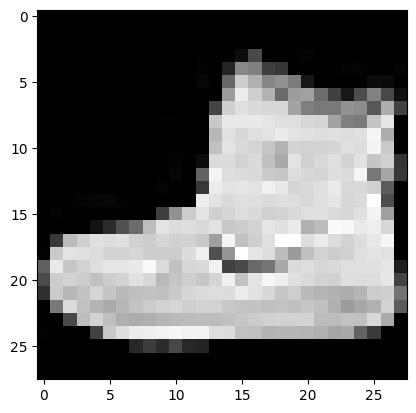

In [41]:
plt.imshow(image.squeeze(), cmap='gray')

In [42]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_2.parameters(), lr=0.1)

In [43]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

from timeit import default_timer as timer
train_time_start_model_2 = timer()

epochs = 3
for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch}\n-----------------")
  train_step(
    model=model_2,
    data_loader=train_dataloader,
    loss_fn=loss_fn,
    optimizer=optimizer,
    accuracy_fn=accuracy_fn,
    device=device
  )
  test_step(
    model=model_2,
    data_loader=test_dataloader,
    loss_fn=loss_fn,
    accuracy_fn=accuracy_fn,
    device=device
  )
train_time_end_model_2 = timer()
total_train_time_model_2 = print_train_time(
  start=train_time_start_model_2,
  end=train_time_end_model_2,
  device=device
)


  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
-----------------
Train Loss: 0.5952 | Train acc: 78.38%
Test Loss: 0.3953 | Test acc: 85.98%
Epoch: 1
-----------------
Train Loss: 0.3642 | Train acc: 86.86%
Test Loss: 0.3896 | Test acc: 86.13%
Epoch: 2
-----------------
Train Loss: 0.3247 | Train acc: 88.31%
Test Loss: 0.3500 | Test acc: 87.45%
Train time on cpu: 180.502 seconds


In [44]:
model_2_results = eval_model(
  model=model_2,
  data_loader=test_dataloader,
  loss_fn=loss_fn,
  accuracy_fn=accuracy_fn,
  device=device
)
model_2_results

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.3494281768798828,
 'model_acc': 87.47004792332268}

In [45]:
import pandas as pd
compare_results = pd.DataFrame(
  [model_0_results,
  model_1_results,
  model_2_results]
)
compare_results

,model_name,model_loss,model_acc
0,FashionMNISTModelV0,0.516177,82.917332
1,FashionMNISTModelV1,0.687984,75.628994
2,FashionMNISTModelV2,0.349428,87.470048


In [46]:
compare_results['training_time'] = [
  total_train_time_model_0,
  total_train_time_model_1,
  total_train_time_model_2
]
compare_results

,model_name,model_loss,model_acc,training_time
0,FashionMNISTModelV0,0.516177,82.917332,35.680915
1,FashionMNISTModelV1,0.687984,75.628994,37.988019
2,FashionMNISTModelV2,0.349428,87.470048,180.502212


Text(0, 0.5, 'model')

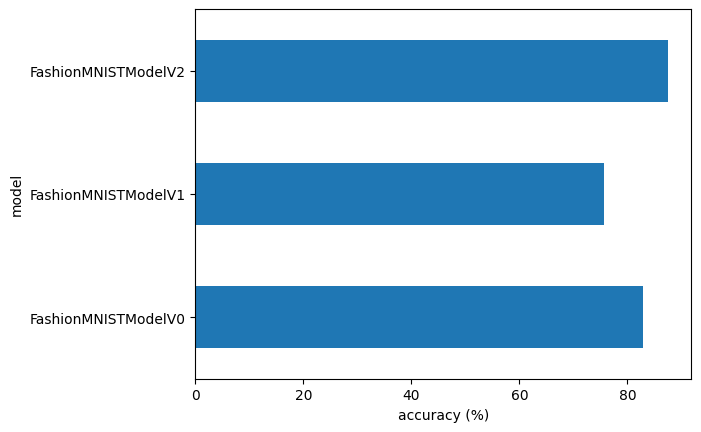

In [47]:
compare_results.set_index('model_name')['model_acc'].plot(kind='barh')
plt.xlabel('accuracy (%)')
plt.ylabel('model')

In [48]:
def make_predictions(
  model: torch.nn.Module,
  data: list,
  device: torch.device = device
):
  pred_probs = []
  model.to(device)
  model.eval()
  with torch.inference_mode():
    for sample in data:
      sample = torch.unsqueeze(sample, dim=0).to(device)
      pred_logit = model(sample)
      pred_prob = torch.softmax(pred_logit.squeeze(), dim=0)
      pred_probs.append(pred_prob.cpu())

  return torch.stack(pred_probs)

In [49]:
import random

# random.seed()
test_samples = []
test_labels = []

for sample, label in random.sample(list(test_data), k=9):
  test_samples.append(sample)
  test_labels.append(label)

test_samples[0].shape

torch.Size([1, 28, 28])

Text(0.5, 1.0, 'Trouser')

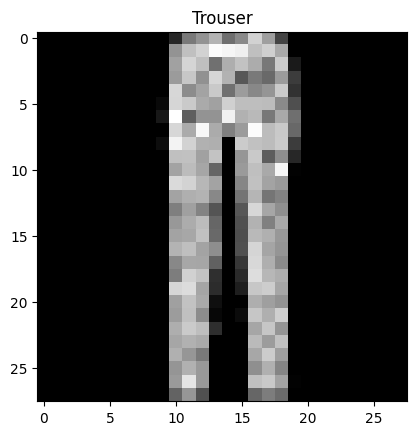

In [50]:
plt.imshow(test_samples[0].squeeze(), cmap='gray')
plt.title(class_names[test_labels[0]])

In [51]:
pred_probs = make_predictions(model=model_2, data=test_samples)

pred_probs

tensor([[6.1440e-05, 9.8339e-01, 3.6047e-06, 1.6247e-02, 4.8309e-05, 1.6398e-06,
         2.0677e-05, 1.3041e-04, 6.8016e-05, 2.7507e-05],
        [2.0285e-03, 8.2860e-05, 7.8941e-01, 6.4008e-04, 1.3533e-01, 3.3053e-06,
         4.2814e-02, 2.1970e-05, 2.9645e-02, 2.5292e-05],
        [1.1387e-04, 1.6456e-04, 3.1035e-01, 1.5754e-05, 6.8776e-01, 7.3301e-07,
         1.1434e-03, 4.0535e-06, 4.3809e-04, 1.2231e-05],
        [3.0155e-02, 5.4779e-04, 9.0401e-01, 1.2807e-03, 5.6946e-03, 9.6797e-05,
         5.0678e-02, 9.6405e-05, 7.1773e-03, 2.6714e-04],
        [6.4975e-03, 9.7938e-04, 7.0845e-03, 9.7818e-01, 2.6952e-03, 8.6067e-07,
         4.2585e-03, 4.0239e-05, 2.6428e-04, 2.5367e-06],
        [2.8688e-03, 5.6047e-04, 6.1103e-02, 3.4628e-03, 9.2074e-01, 2.4784e-06,
         5.9796e-03, 1.0370e-05, 5.2705e-03, 6.1269e-06],
        [2.1068e-07, 2.1370e-08, 7.5405e-08, 1.0069e-07, 2.6132e-08, 9.9999e-01,
         8.8389e-09, 3.7032e-06, 3.1043e-06, 3.5593e-08],
        [6.3990e-07, 3.2563

In [52]:
pred_classes = pred_probs.argmax(dim=1)
print(pred_classes)
print(test_labels)

tensor([1, 2, 4, 2, 3, 4, 5, 5, 8])
[1, 2, 2, 6, 3, 4, 5, 5, 8]


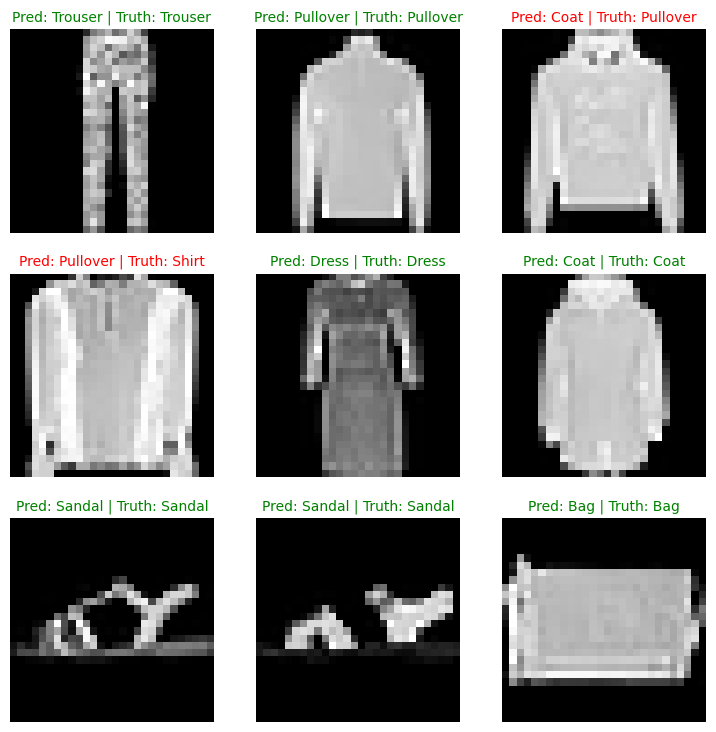

In [53]:
plt.figure(figsize=(9, 9))

nrows = 3
ncols = 3

for i, sample in enumerate(test_samples):
  plt.subplot(nrows, ncols, i+1)

  plt.imshow(sample.squeeze(), cmap='gray')
  pred_label = class_names[pred_classes[i]]
  truth_label =class_names[test_labels[i]]
  plt.axis(False)

  title_text = f"Pred: {pred_label} | Truth: {truth_label}"

  if pred_label == truth_label:
    plt.title(title_text, fontsize=10, c="g")
  else:
    plt.title(title_text, fontsize=10, c='r')

In [60]:
from tqdm.auto import tqdm

torch.manual_seed(42)
y_preds = []
model_2.eval()
with torch.inference_mode():
  acc = 0
  for X, y in tqdm(test_dataloader, desc='Makeing predictions...'):
    X, y = X.to(device), y.to(device)
    y_logit = model_2(X)
    y_pred = torch.softmax(y_logit, dim=1).argmax(dim=1)
    acc += accuracy_fn(y_true=y, y_pred=y_pred)
    y_preds.append(y_pred.cpu())
    # print(y_pred)
  print(acc / len(test_dataloader))
y_pred_tensor = torch.cat(y_preds)
print(y_pred_tensor[:10])

Makeing predictions...:   0%|          | 0/313 [00:00<?, ?it/s]

87.46006389776358
tensor([9, 2, 1, 1, 6, 1, 2, 6, 5, 7])


In [55]:

# See if torchmetrics exists, if not, install it
try:
    import torchmetrics, mlxtend
    print(f"mlxtend version: {mlxtend.__version__}")
    assert int(mlxtend.__version__.split(".")[1]) >= 19, "mlxtend verison should be 0.19.0 or higher"
except:
    !pip install -q torchmetrics -U mlxtend # <- Note: If you're using Google Colab, this may require restarting the runtime
    import torchmetrics, mlxtend
    print(f"mlxtend version: {mlxtend.__version__}")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 840.4/840.4 kB 4.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 24.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 32.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 41.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 35.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 1.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 3.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 9.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 6.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/196.0 MB 4.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 166.0/166.0 MB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━

In [56]:
import mlxtend
mlxtend.__version__

'0.23.1'

tensor([[846,   0,  22,  30,   3,   2,  88,   0,   9,   0],
        [  3, 968,   0,  23,   1,   0,   3,   0,   2,   0],
        [ 17,   1, 875,   9,  38,   0,  57,   0,   3,   0],
        [ 29,   2,  17, 899,  17,   0,  30,   0,   6,   0],
        [  0,   1, 163,  47, 709,   0,  71,   0,   9,   0],
        [  0,   0,   0,   1,   0, 941,   0,  50,   0,   8],
        [139,   2, 118,  27,  79,   1, 607,   0,  27,   0],
        [  0,   0,   0,   0,   0,   3,   0, 977,   0,  20],
        [  1,   1,   6,   4,   1,   2,   2,   7, 976,   0],
        [  0,   0,   0,   1,   0,   5,   0,  46,   0, 948]])


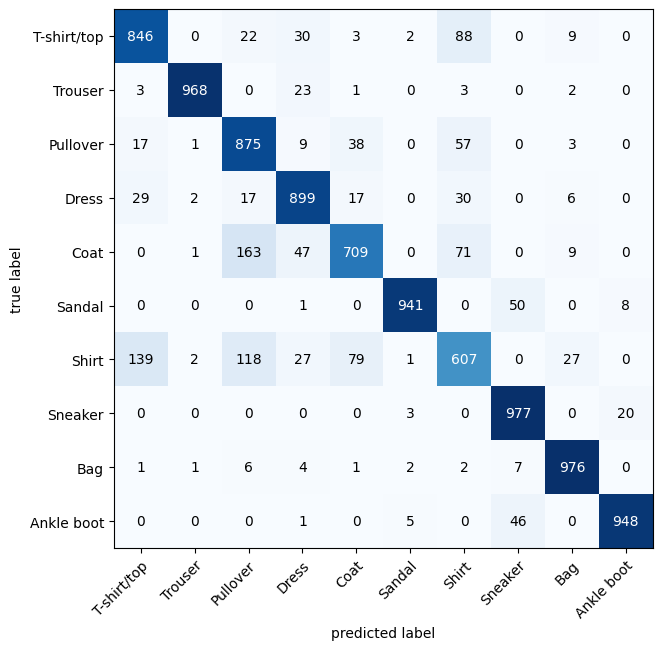

In [61]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

confmat = ConfusionMatrix(task="multiclass", num_classes=len(class_names))
confmat_tensor = confmat(
  preds=y_pred_tensor,
  target=test_data.targets
)
print(confmat_tensor)
fig, ax = plot_confusion_matrix(
  conf_mat=confmat_tensor.numpy(),
  class_names=class_names,
  figsize=(10, 7)
)

In [63]:
from pathlib import Path

MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

MODEL_NAME = "03_pytorch_computer_vision_model_2.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

torch.save(obj=model_2.state_dict(), f=MODEL_SAVE_PATH)

In [64]:
torch.manual_seed(42)
loaded_model_2 = FashionMNISTModelV2(
  input_shape=1,
  hidden_units=10,
  output_shape=len(class_names)
)

loaded_model_2.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

loaded_model_2.to(device)

FashionMNISTModelV2(
  (conv_block1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [65]:
model_2_results

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.3494281768798828,
 'model_acc': 87.47004792332268}

In [66]:
torch.manual_seed(42)

loaded_model_2_results = eval_model(
  model=loaded_model_2,
  data_loader=test_dataloader,
  loss_fn=loss_fn,
  accuracy_fn=accuracy_fn
)
loaded_model_2_results

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.34938228130340576,
 'model_acc': 87.46006389776358}

In [68]:
# Chek if model results are close to each other
torch.isclose(
  torch.tensor(model_2_results['model_loss']),
  torch.tensor(loaded_model_2_results['model_loss']),
  atol=1e-3
)

tensor(True)